<a href="https://colab.research.google.com/github/anushka-dere/simple-linear-regression/blob/main/Problem_statements.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Delivery_time**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [ ]:
dataset1 = pd.read_csv("/content/delivery_time.csv")
dataset1

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


EDA and Data Visualization

In [ ]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
dataset1.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [ ]:
dataset1['Delivery Time'].describe()

count    21.000000
mean     16.790952
std       5.074901
min       8.000000
25%      13.500000
50%      17.830000
75%      19.750000
max      29.000000
Name: Delivery Time, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


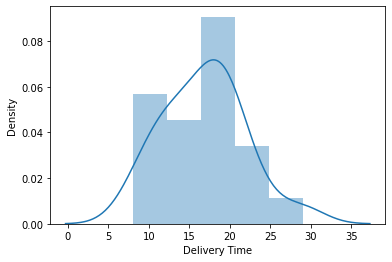

In [ ]:
sns.distplot(dataset1['Delivery Time'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


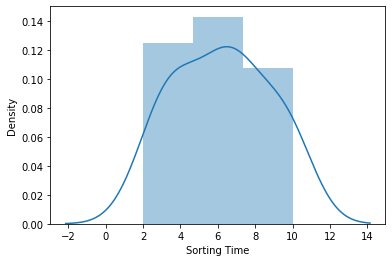

In [ ]:
sns.distplot(dataset1['Sorting Time'])

Feature engineering

In [ ]:
dataset1=dataset1.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
dataset1

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


correlation Analysis

In [ ]:
dataset1.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


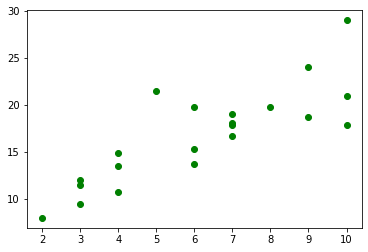

In [ ]:
plt.scatter(x=dataset1['sorting_time'],y=dataset1['delivery_time'],color='green')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2cda00ffd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2cda012a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2cda00fa10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2cda019590>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2cda019ad0>],
 'means': []}

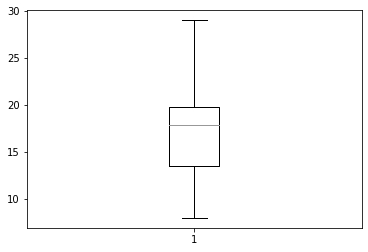

In [ ]:
plt.boxplot(dataset1['delivery_time'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2cd9fcb3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2cd9fcba90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2cda0225d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2cd9fd5090>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2cd9f8f050>],
 'means': []}

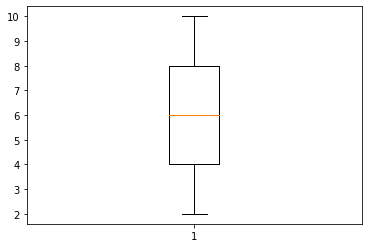

In [ ]:
plt.boxplot(dataset1['sorting_time'])

(array([5., 4., 8., 3., 1.]),
 array([ 8. , 12.2, 16.4, 20.6, 24.8, 29. ]),
 <a list of 5 Patch objects>)

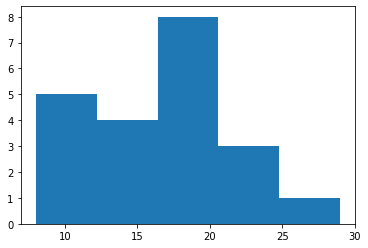

In [ ]:
plt.hist(dataset1['delivery_time'], bins=5)

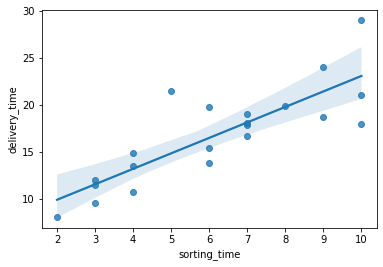

In [ ]:
sns.regplot(x=dataset1['sorting_time'],y=dataset1['delivery_time'])

Model Building

In [ ]:
model1=smf.ols('delivery_time~sorting_time',data=dataset1).fit()
model1

Model Testing

In [ ]:
model1.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [ ]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 12 Nov 2022   Prob (F-statistic):           3.98e-06
Time:                        05:46:55   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model1.tvalues, model1.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64, Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [ ]:
model1.rsquared, model1.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [ ]:
model2=smf.ols('delivery_time~np.log(sorting_time)',data=dataset1).fit()

In [ ]:
model2.params

Intercept               1.159684
np.log(sorting_time)    9.043413
dtype: float64

In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 12 Nov 2022   Prob (F-statistic):           2.64e-06
Time:                        05:49:56   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model1.conf_int(0.05) #95% confidence interval

,0,1
Intercept,2.979134,10.186334
sorting_time,1.108673,2.189367


In [ ]:
model2.conf_int(0.05)

,0,1
Intercept,-3.97778,6.297147
np.log(sorting_time),6.16977,11.917057


In [ ]:
model2.tvalues, model2.pvalues

(Intercept               0.472460
 np.log(sorting_time)    6.586789
 dtype: float64, Intercept               0.641980
 np.log(sorting_time)    0.000003
 dtype: float64)

In [ ]:
model2.rsquared, model2.rsquared_adj

(0.6954434611324223, 0.6794141696130761)

Model Predictions

In [ ]:
delivery_time1 =(6.582734)+(1.649020)*(5) #manual prediction for say sorting time 5
delivery_time1

14.827834

In [ ]:
new_data1=pd.Series([5,8]) #automatic prediction for sorting time 5, 8
new_data1

0    5
1    8
dtype: int64

In [ ]:
data_pred1=pd.DataFrame(new_data1,columns=['sorting_time'])
data_pred1

,sorting_time
0,5
1,8


In [ ]:
model1.predict(data_pred1)

0    14.827833
1    19.774893
dtype: float64

In [ ]:
new_data2=pd.Series([5,8]) #automatic prediction for sorting time 5, 8
new_data2

0    5
1    8
dtype: int64

In [ ]:
data_pred2=pd.DataFrame(new_data1,columns=['sorting_time'])
data_pred2

,sorting_time
0,5
1,8


In [ ]:
model2.predict(data_pred2)

0    15.714496
1    19.964933
dtype: float64

In [ ]:
pred1 = model1.predict(dataset1)

In [ ]:
pred2 = model2.predict(dataset1)
pred2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

Text(0, 0.5, 'Delivery Time')

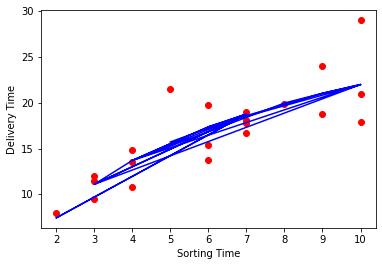

In [ ]:
plt.scatter(x=dataset1['sorting_time'],y=dataset1['delivery_time'], color='red')
plt.plot(dataset1['sorting_time'], pred2,color='blue')
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")

**Salary_hike**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [ ]:
dataset2 = pd.read_csv("/content/Salary_Data.csv")
dataset2

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


EDA and Data Visualization

In [ ]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


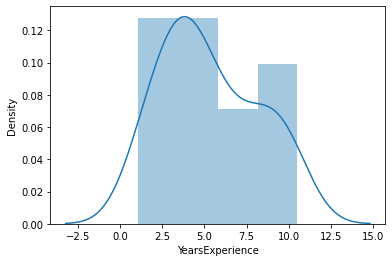

In [ ]:
sns.distplot(dataset2['YearsExperience'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


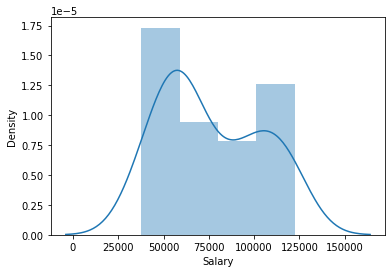

In [ ]:
sns.distplot(dataset2['Salary'])

Feature engineering

In [ ]:
dataset2=dataset2.rename({'YearsExperience':'Experience'},axis=1)
dataset2

,Experience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


correlation Analysis

In [ ]:
dataset2.corr()

,Experience,Salary
Experience,1.000000,0.978242
Salary,0.978242,1.000000


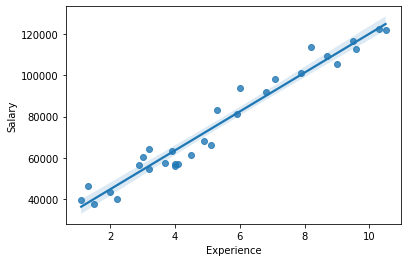

In [ ]:
sns.regplot(x=dataset2['Experience'],y=dataset2['Salary'])

Model Building

In [ ]:
model2=smf.ols('Salary~Experience',data=dataset2).fit()
model2

Model Testing

In [ ]:
model2.params

Intercept     25792.200199
Experience     9449.962321
dtype: float64

In [ ]:
model2.tvalues, model2.pvalues

(Intercept     11.346940
 Experience    24.950094
 dtype: float64, Intercept     5.511950e-12
 Experience    1.143068e-20
 dtype: float64)

In [ ]:
model2.rsquared, model2.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

Model Predictions

In [ ]:
Salary =(25792.200199)+(9449.962321)*(3) #manual prediction for say 3 years experience
Salary

54142.087162

In [ ]:
new_data2=pd.Series([3,5]) # auromatic prediction for 3 & 5 years experience
new_data2

0    3
1    5
dtype: int64

In [ ]:
data_pred2=pd.DataFrame(new_data2,columns=['Experience'])
data_pred2

,Experience
0,3
1,5


In [ ]:
model2.predict(data_pred2)

0    54142.087163
1    73042.011806
dtype: float64